<a href="https://colab.research.google.com/github/Homedepot5/DataScience/blob/origin%2Ffeature%2Fdevelopment/2_outliers_zsccoreExcersie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
from google.colab import files
import io

In [2]:
uploaded=files.upload()

Saving bhp2.csv to bhp2.csv


In [3]:
df=pd.read_csv(io.BytesIO(uploaded['bhp2.csv']))
df


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [6]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

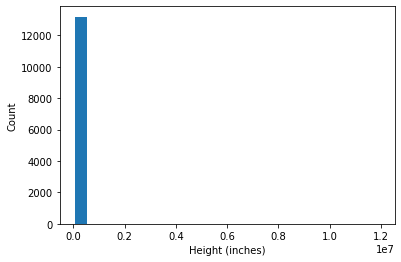

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

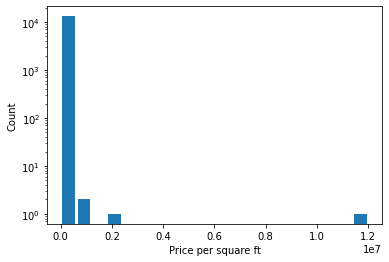

In [7]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [8]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [9]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
12355,other,4 BHK,16335.0,4.0,149.0,4,912
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [10]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [11]:
df.shape[0] - df2.shape[0]

28

In [12]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [13]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333
9786,2nd Stage Nagarbhavi,5 Bedroom,1200.0,5.0,290.0,5,24166
2830,BTM 2nd Stage,4 Bedroom,1500.0,2.0,450.0,4,30000
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961
11919,other,3 Bedroom,1524.0,4.0,400.0,3,26246
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000
2258,other,4 Bedroom,3200.0,4.0,1200.0,4,37500
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333


In [14]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

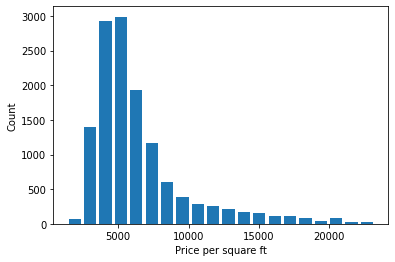

In [15]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

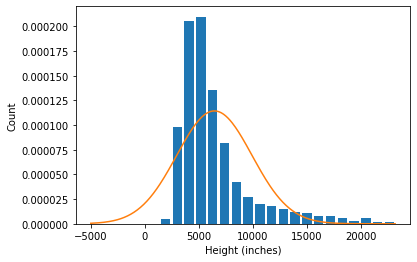

In [16]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

(3) Now remove outliers using z score. Use z score of 4 as your thresold

In [19]:
df2.price_per_sqft.std()

4141.020700174605

In [17]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7360,Raja Rajeshwari Nagar,3 BHK,1400.0,2.0,48.0,3,3428,-0.781366
1593,Sahakara Nagar,2 BHK,1219.0,2.0,48.0,2,3937,-0.658450
11501,Basavangudi,6 Bedroom,1214.0,3.0,220.0,6,18121,2.766793
951,Rajaji Nagar,3 BHK,1725.0,3.0,200.0,3,11594,1.190611
80,Yelahanka,2 BHK,1326.0,2.0,78.0,2,5882,-0.188759
6789,other,2 BHK,1080.0,2.0,44.8,2,4148,-0.607496
3309,Kanakpura Road,3 BHK,1100.0,3.0,53.0,3,4818,-0.445700
5517,Banashankari,2 BHK,1460.0,2.0,70.0,2,4794,-0.451496
2468,Bannerghatta Road,3 BHK,1550.0,3.0,78.0,3,5032,-0.394022
10715,Thigalarapalya,4 BHK,4303.0,5.0,300.0,4,6971,0.074220


In [18]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [20]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [21]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [22]:
df2.shape[0] - df4.shape[0]

125